# Examples of Working with TAP-exported .csv Data

In [1]:
import os
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict

import warnings
warnings.simplefilter('ignore')

### Navigate to lcmap-science/dan-stuff/notebooks and open jupyter
```bash
cd lcmap-science/dan-stuff/notebooks
jupyter notebook
```

In [2]:
import data_tools as tools
import indices

### Specify the CSV file containing the data to analyze


In [3]:
# One example of the possible file location:
# in_csv = r'C:\your\user\home\folder\lcmap_tap\20190214-081736\20190214-081907_-2244375_1925265.csv'

# Another example of specifying the file on-the-fly
# in_csv = input("Full path to TAP-exported .csv file: ")

# Or, use the local sample .csv
in_csv = '20190214-081907_-2244375_1925265.csv'

assert os.path.exists(in_csv)

### Read in the data

In [4]:
data = tools.load_csv(in_csv)

### Show a preview of the data frame

In [5]:
data.head()

,blues,greens,reds,nirs,swir1s,swir2s,thermals,qa,dates
0,-9999,-9999,-9999,-9999,-9999,-9999,-9999,1,1982-12-01
1,-9999,-9999,-9999,-9999,-9999,-9999,-9999,1,1982-12-08
2,568,650,503,1895,758,327,665,66,1982-12-31
3,-9999,-9999,-9999,-9999,-9999,-9999,-9999,1,1983-01-09
4,-9999,-9999,-9999,-9999,-9999,-9999,-9999,1,1983-01-18


### Get Mean Annual Index Values for June-July-August

In [6]:
params = {'start_mon': 6,
          
          'start_day': 1,
          
          'end_mon': 8,
         
          'end_day': 31,
         
          'field': 'msavi',
         
          'mask_field': 'qa'}

try:
    msavi = tools.get_seasonal_info(data, params)
    
except KeyError:
    data['msavi'] = indices.msavi(data.reds, data.nirs)
    
    msavi = tools.get_seasonal_info(data, params)

In [7]:
params = {'start_mon': 6,
         'start_day': 1,
         'end_mon': 8,
         'end_day': 31,
         'field': 'ndvi',
         'mask_field': 'qa'}

try:
    ndvi = tools.get_seasonal_info(data, params)
    
except KeyError:
    data['ndvi'] = indices.ndvi(data.reds, data.nirs)
    
    ndvi = tools.get_seasonal_info(data, params)

In [8]:
params = {'start_mon': 6,
         'start_day': 1,
         'end_mon': 8,
         'end_day': 31,
         'field': 'evi',
         'mask_field': 'qa'}

try:
    evi = tools.get_seasonal_info(data, params)
    
except KeyError:
    data['evi'] = indices.evi(data.blues, data.reds, data.nirs)
    
    evi = tools.get_seasonal_info(data, params)

In [9]:
params = {'start_mon': 6,
         'start_day': 1,
         'end_mon': 8,
         'end_day': 31,
         'field': 'savi',
         'mask_field': 'qa'}

try:
    savi = tools.get_seasonal_info(data, params)
    
except KeyError:
    data['savi'] = indices.savi(data.reds, data.nirs)
    
    savi = tools.get_seasonal_info(data, params)



Show an example of what was just created:

In [10]:
msavi.keys()

odict_keys([1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

In [11]:
msavi[2002]

OrderedDict([('min', 0.4608990616938521),
             ('max', 0.5362764705284163),
             ('mean', 0.4608990616938521),
             ('std', 0.08033596706259569)])

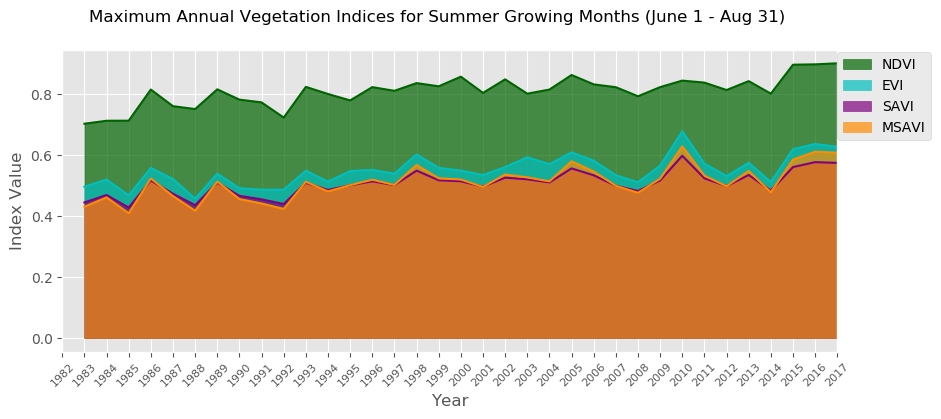

In [12]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(10,4), dpi=100)

ax = fig.add_subplot(111)

plt.xticks(tools.years(data), rotation=45, fontsize=8)

plt.xlim(tools.years(data)[0], tools.years(data)[-1])

ax.fill_between(*tools.plot_data(ndvi, 'max'), interpolate=True, color='darkgreen', alpha=0.7, label='NDVI')
ax.plot(*tools.plot_data(ndvi, 'max'), color='darkgreen')

ax.fill_between(*tools.plot_data(evi, 'max'), interpolate=True, color='c', alpha=0.7, label='EVI')
ax.plot(*tools.plot_data(evi, 'max'), color='c')

ax.fill_between(*tools.plot_data(savi, 'max'), interpolate=True, color='purple', alpha=0.7, label='SAVI')
ax.plot(*tools.plot_data(savi, 'max'), color='purple')

ax.fill_between(*tools.plot_data(msavi, 'max'), interpolate=True, color='darkorange', alpha=0.7, label='MSAVI')
ax.plot(*tools.plot_data(msavi, 'max'), color='darkorange')

ax.set_xlabel('Year')
ax.set_ylabel('Index Value')

plt.suptitle("Maximum Annual Vegetation Indices for Summer Growing Months (June 1 - Aug 31)")

plt.legend(loc=(1, .7))

plt.show()

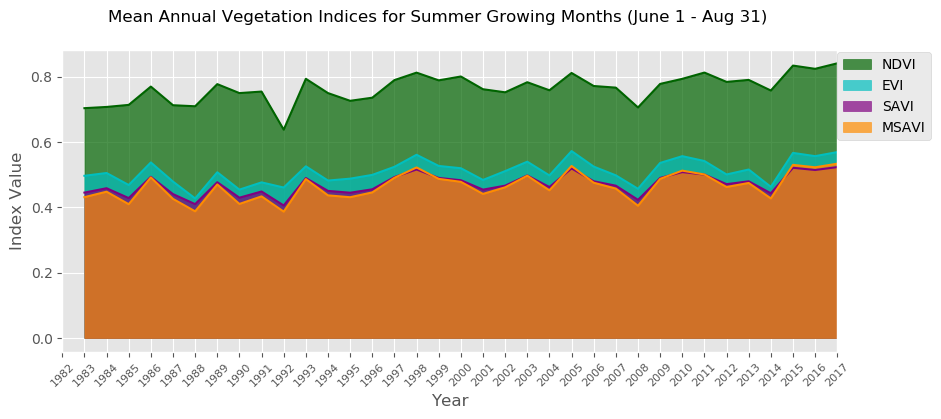

In [13]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(10,4), dpi=100)

ax = fig.add_subplot(111)

plt.xlim(tools.years(data)[0], tools.years(data)[-1])

plt.xticks(tools.years(data), rotation=45, fontsize=8)

ax.fill_between(*tools.plot_data(ndvi, 'mean'), interpolate=True, color='darkgreen', alpha=0.7, label='NDVI')
ax.plot(*tools.plot_data(ndvi, 'mean'), color='darkgreen')

ax.fill_between(*tools.plot_data(evi, 'mean'), interpolate=True, color='c', alpha=0.7, label='EVI')
ax.plot(*tools.plot_data(evi, 'mean'), color='c')

ax.fill_between(*tools.plot_data(savi, 'mean'), interpolate=True, color='purple', alpha=0.7, label='SAVI')
ax.plot(*tools.plot_data(savi, 'mean'), color='purple')

ax.fill_between(*tools.plot_data(msavi, 'mean'), interpolate=True, color='darkorange', alpha=0.7, label='MSAVI')
ax.plot(*tools.plot_data(msavi, 'mean'), color='darkorange')

ax.set_xlabel('Year')
ax.set_ylabel('Index Value')

plt.legend(loc=(1, 0.7))

plt.suptitle("Mean Annual Vegetation Indices for Summer Growing Months (June 1 - Aug 31)")

plt.show()

### Get the spectral signature for a target land cover

Provide a date to find the nearest acquisition in time:

In [14]:
date = (2015, 7, 1)

In [15]:
selection = tools.spectral_signature(data, date)

selection

blues                       333
greens                      456
reds                        370
nirs                       3243
swir1s                     1373
swir2s                      510
thermals                   2635
qa                           66
dates       2015-07-03 00:00:00
msavi                  0.500463
ndvi                   0.795184
evi                     0.55397
savi                   0.500348
Name: 2591, dtype: object

In [16]:
x, y = tools.plot_spectral(selection)

In [17]:
x, y

(['blues', 'greens', 'reds', 'nirs', 'swir1s', 'swir2s'],
 [333, 456, 370, 3243, 1373, 510])

In [18]:
x = [i[:-1] for i in x]
x

['blue', 'green', 'red', 'nir', 'swir1', 'swir2']

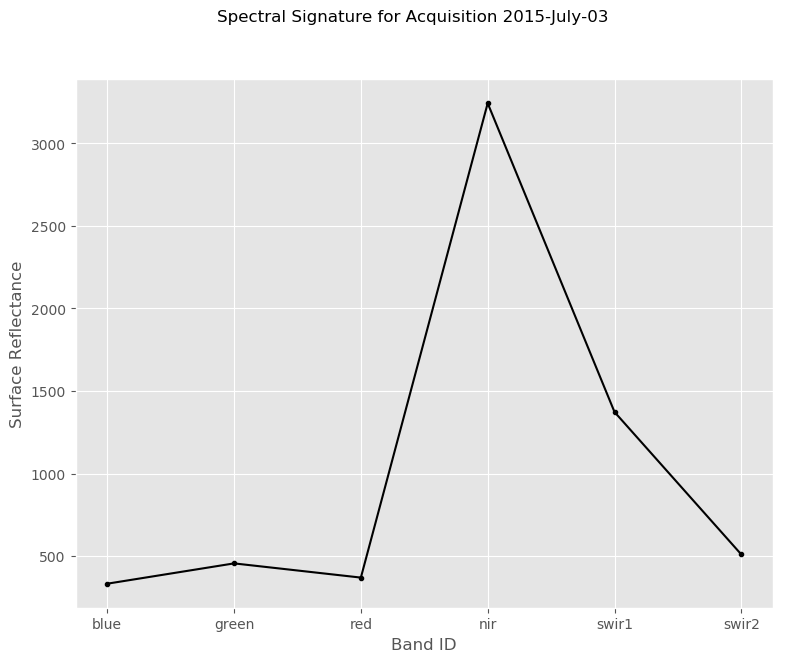

In [19]:
fig, ax = plt.subplots(figsize=(9, 7), dpi=100)

ax.plot(x, y, marker='.', color='k')
ax.set_xlabel('Band ID')
ax.set_ylabel('Surface Reflectance')

fig.suptitle("Spectral Signature for Acquisition {}".format(selection['dates'].strftime('%Y-%B-%d')))

plt.show()

In [20]:
params = {'start_mon': 6,
         'start_day': 1,
         'end_mon': 8,
         'end_day': 31,
         'field': 'blues',
         'mask_field': 'qa'}

blues = tools.get_seasonal_info(data, params)

In [21]:
params = {'start_mon': 6,
         'start_day': 1,
         'end_mon': 8,
         'end_day': 31,
         'field': 'greens',
         'mask_field': 'qa'}

greens = tools.get_seasonal_info(data, params)

In [22]:
params = {'start_mon': 6,
         'start_day': 1,
         'end_mon': 8,
         'end_day': 31,
         'field': 'reds',
         'mask_field': 'qa'}

reds = tools.get_seasonal_info(data, params)

In [23]:
params = {'start_mon': 6,
         'start_day': 1,
         'end_mon': 8,
         'end_day': 31,
         'field': 'nirs',
         'mask_field': 'qa'}

nirs = tools.get_seasonal_info(data, params)

In [24]:
params = {'start_mon': 6,
         'start_day': 1,
         'end_mon': 8,
         'end_day': 31,
         'field': 'swir1s',
         'mask_field': 'qa'}

swir1s = tools.get_seasonal_info(data, params)

In [25]:
params = {'start_mon': 6,
         'start_day': 1,
         'end_mon': 8,
         'end_day': 31,
         'field': 'swir2s',
         'mask_field': 'qa'}

swir2s = tools.get_seasonal_info(data, params)

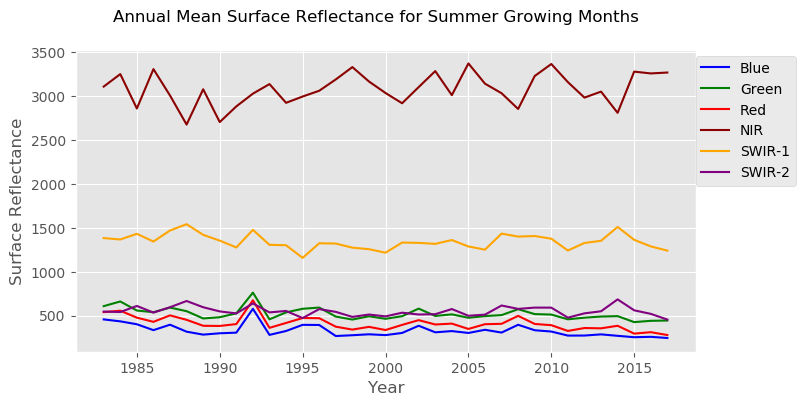

In [26]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=100)

ax.plot(*tools.plot_data(blues, 'mean'), 'blue', label='Blue')
ax.plot(*tools.plot_data(greens, 'mean'), 'green', label='Green')
ax.plot(*tools.plot_data(reds, 'mean'), 'red', label='Red')
ax.plot(*tools.plot_data(nirs, 'mean'), 'darkred', label='NIR')
ax.plot(*tools.plot_data(swir1s, 'mean'), 'orange', label='SWIR-1')
ax.plot(*tools.plot_data(swir2s, 'mean'), 'purple', label='SWIR-2')

ax.set_xlabel('Year')
ax.set_ylabel('Surface Reflectance')

plt.suptitle('Annual Mean Surface Reflectance for Summer Growing Months')

plt.legend(loc=(1, 0.55))

plt.show()

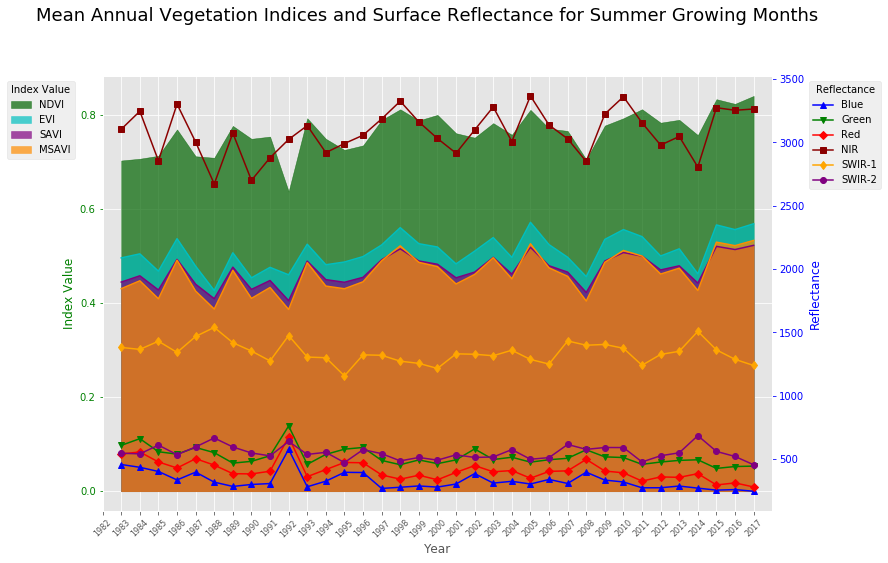

In [27]:
plt.style.use('ggplot')

fig, ax1 = plt.subplots(figsize=(12, 8))

fig.suptitle("Mean Annual Vegetation Indices and Surface Reflectance for Summer Growing Months", x=0.5, y=1, fontsize=18)

# fig.set_size_inches((14, 8))

plt.xticks(tools.years(data), rotation=45, fontsize=8)

plt.xlim(tools.years(data)[0], tools.years(data)[-1] + 1)

ax1.fill_between(*tools.plot_data(ndvi, 'mean'), interpolate=True, color='darkgreen', alpha=0.7, label='NDVI')
ax.plot(*tools.plot_data(ndvi, 'mean'), color='darkgreen')

ax1.fill_between(*tools.plot_data(evi, 'mean'), interpolate=True, color='c', alpha=0.7, label='EVI')
ax1.plot(*tools.plot_data(evi, 'mean'), color='c')

ax1.fill_between(*tools.plot_data(savi, 'mean'), interpolate=True, color='purple', alpha=0.7, label='SAVI')
ax1.plot(*tools.plot_data(savi, 'mean'), color='purple')

ax1.fill_between(*tools.plot_data(msavi, 'mean'), interpolate=True, color='darkorange', alpha=0.7, label='MSAVI')
ax1.plot(*tools.plot_data(msavi, 'mean'), color='darkorange')

ax1.set_xlabel('Year')

ax1.set_ylabel('Index Value', color='g')
ax1.tick_params('y', colors='g')

plt.legend(loc='upper left', bbox_to_anchor=(-.15, 1), framealpha=0.6, title="Index Value")

plt.style.use('ggplot')

ax2 = ax1.twinx()

ax2.plot(*tools.plot_data(blues, 'mean'), 'blue', label='Blue', marker='^')
ax2.plot(*tools.plot_data(greens, 'mean'), 'green', label='Green', marker='v')
ax2.plot(*tools.plot_data(reds, 'mean'), 'red', label='Red', marker='D', ms=6)
ax2.plot(*tools.plot_data(nirs, 'mean'), 'darkred', label='NIR', marker='s')
ax2.plot(*tools.plot_data(swir1s, 'mean'), 'orange', label='SWIR-1', marker='d', ms=6)
ax2.plot(*tools.plot_data(swir2s, 'mean'), 'purple', label='SWIR-2', marker='o')

ax2.grid(False)

ax2.set_ylabel('Reflectance', color='b')
ax2.tick_params('y', colors='b')

plt.legend(loc='upper right', bbox_to_anchor=(1.17, 1), framealpha=0.6, title="Reflectance")

plt.show()

In [28]:
_ndvi = pd.DataFrame(ndvi).transpose()

In [29]:
_ndvi['years'] = tools.years(data)

In [30]:
_ndvi.columns

Index(['max', 'mean', 'min', 'std', 'years'], dtype='object')

''

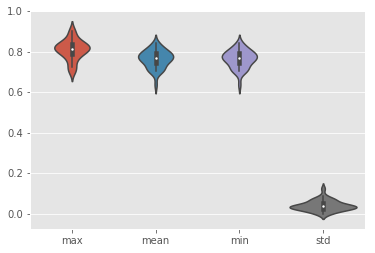

In [31]:
sns.violinplot(data=_ndvi.drop(columns=['years']))
;